# Diwali Sales Analysis 

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# IMport Data
# Read the CSV file into a DataFrame
df = pd.read_csv('sales_data.csv', encoding='unicode_escape')
df.head()  
df.shape 

(11251, 15)

In [5]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [9]:
pd.isnull(df).sum()  # Check for missing values

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
df.dropna(inplace=True)  # Drop rows with missing values

In [12]:
df.shape  # Check the shape of the DataFrame

(11239, 13)

In [ ]:
# Change Data Type
df['Amount'] = df['Amount'].astype(int)  # Convert 'Amount' to integer type


In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [18]:
# use describe for specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis(EDA)

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

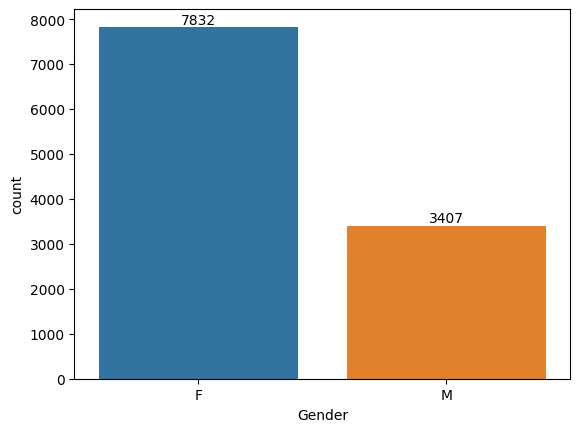

In [26]:
ax = sns.countplot(x = 'Gender', data=df,  hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [27]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

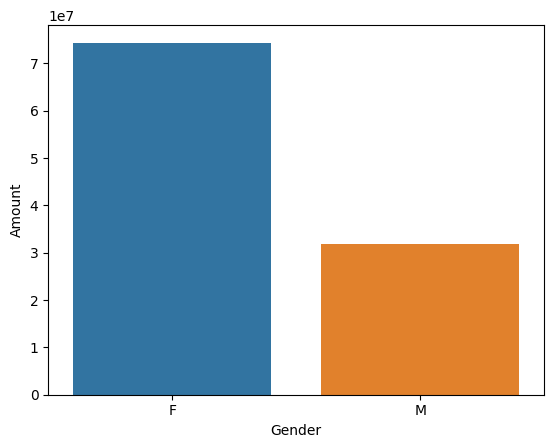

In [29]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen, hue='Gender')

#### From above we can see that the most of the buyers are Female and even the purchasing power of female are greater thean man.

## Age

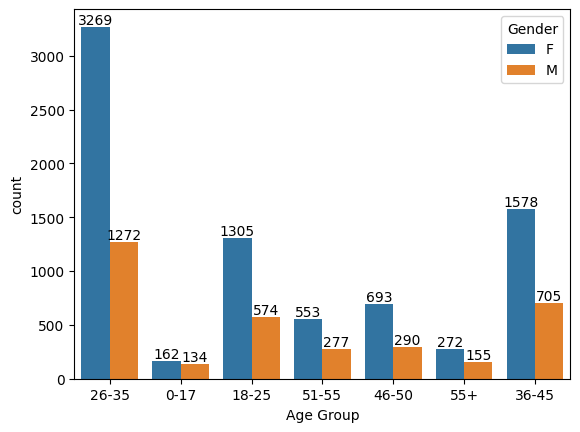

In [31]:
ax = sns.countplot(data=df, x='Age Group', hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

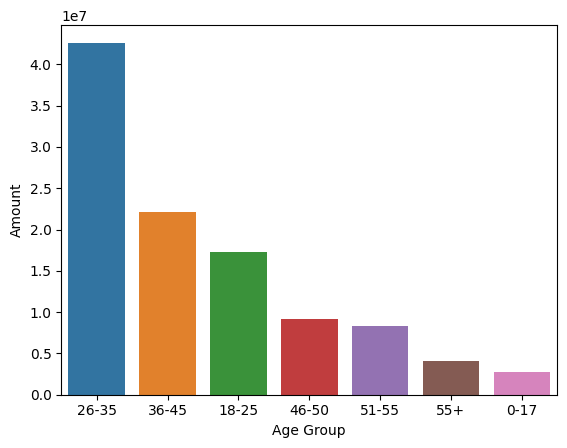

In [32]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age, hue='Age Group')


#### From above graph we can see that most of the buyres are of age group between 26-35 years female.

## State

<Axes: xlabel='State', ylabel='Orders'>

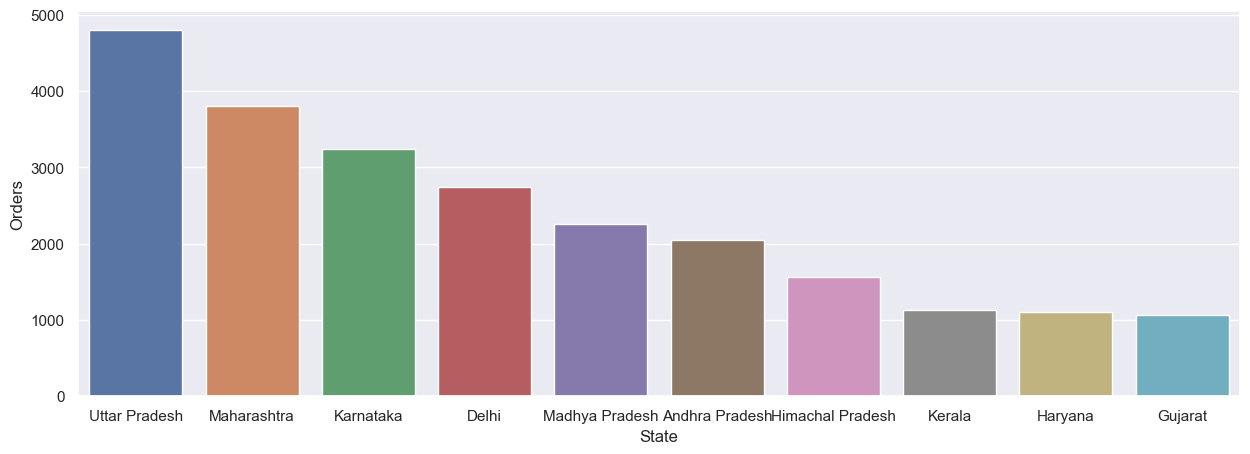

In [34]:
# Total numbers of Orders from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Orders', data = sales_state, hue='State')

<Axes: xlabel='State', ylabel='Amount'>

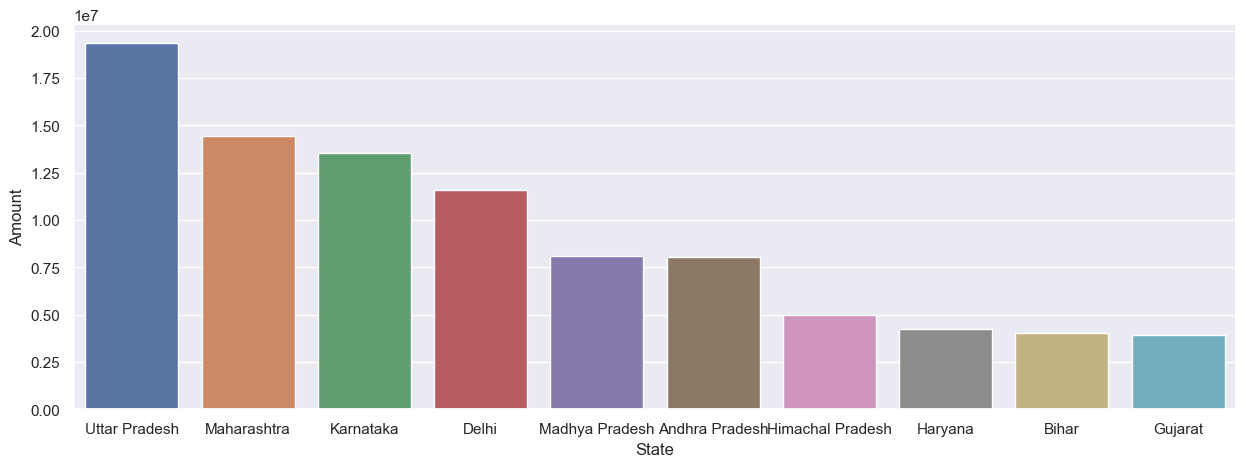

In [37]:
# Total amount of sales from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount', hue='State')

#### From above graph we can see that most of the sales are from Uttar Pradesh, Maharashtra and Karnataka.

## Merital Status

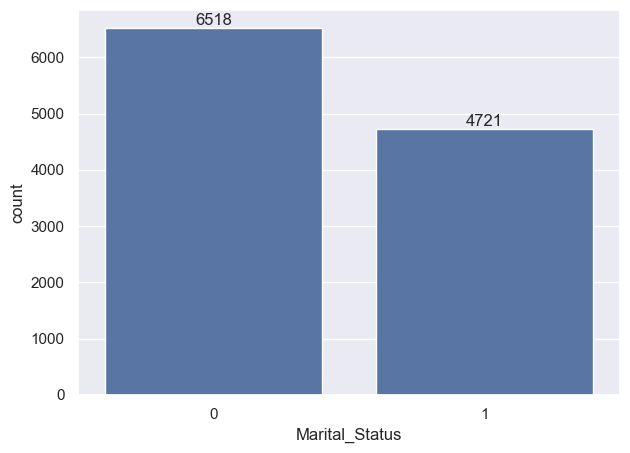

In [45]:
ax = sns.countplot(data = df , x = 'Marital_Status')
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

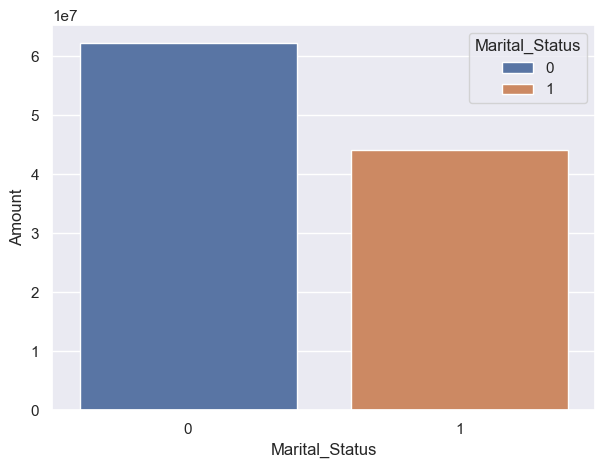

In [50]:
sales_state = df.groupby(['Marital_Status'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Marital_Status')

#### From above graph we can see that most of the buyers are married (women) and they have high purchasing power.

## Occupation

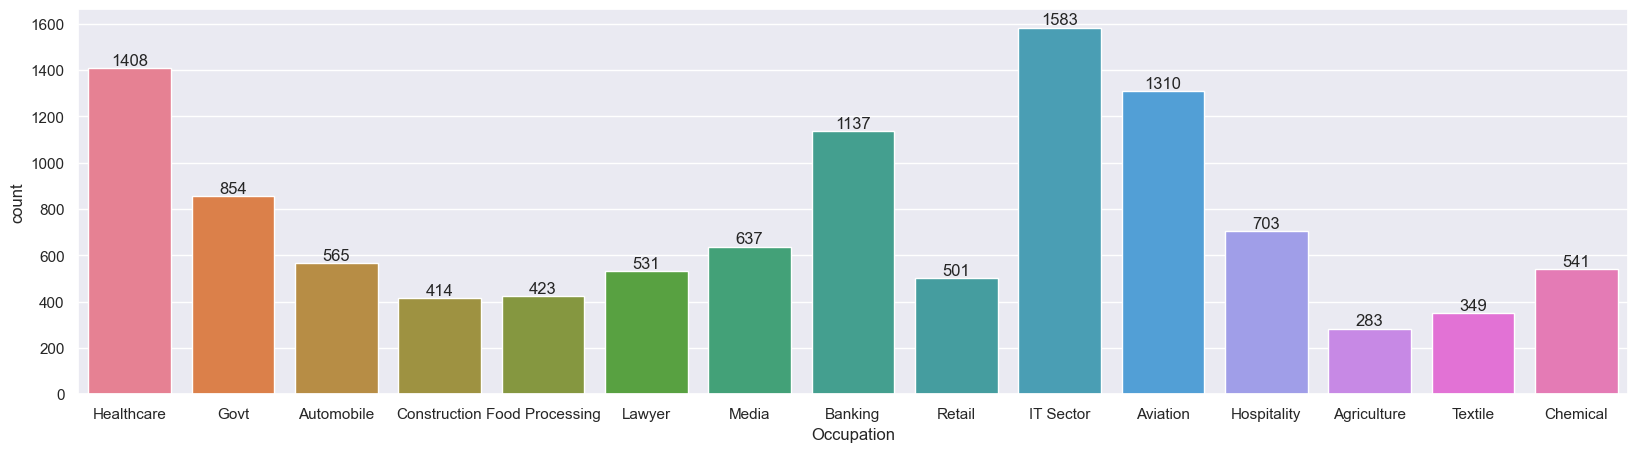

In [53]:
ax = sns.countplot(data=df, x='Occupation', hue='Occupation')
sns.set(rc={'figure.figsize':(22,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

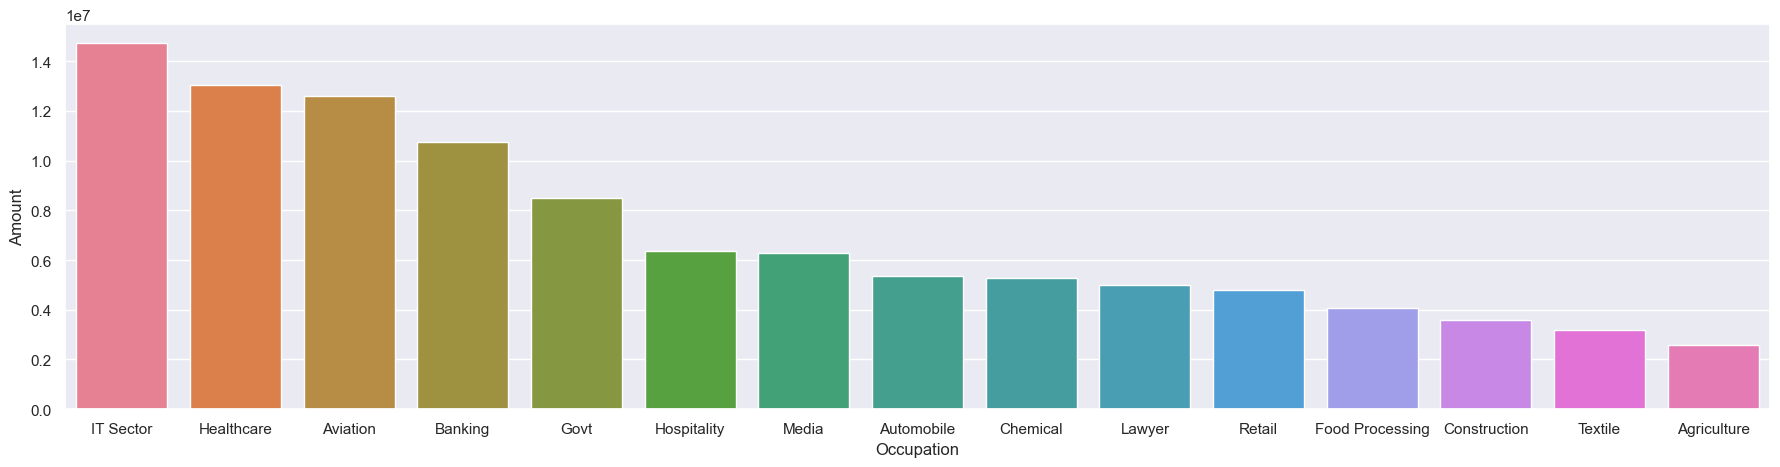

In [54]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(22,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount', hue='Occupation')

#### From above graph we can see that the most of the buyers are working in IT, Healthcare and Aviation sector.

## Product Catogary

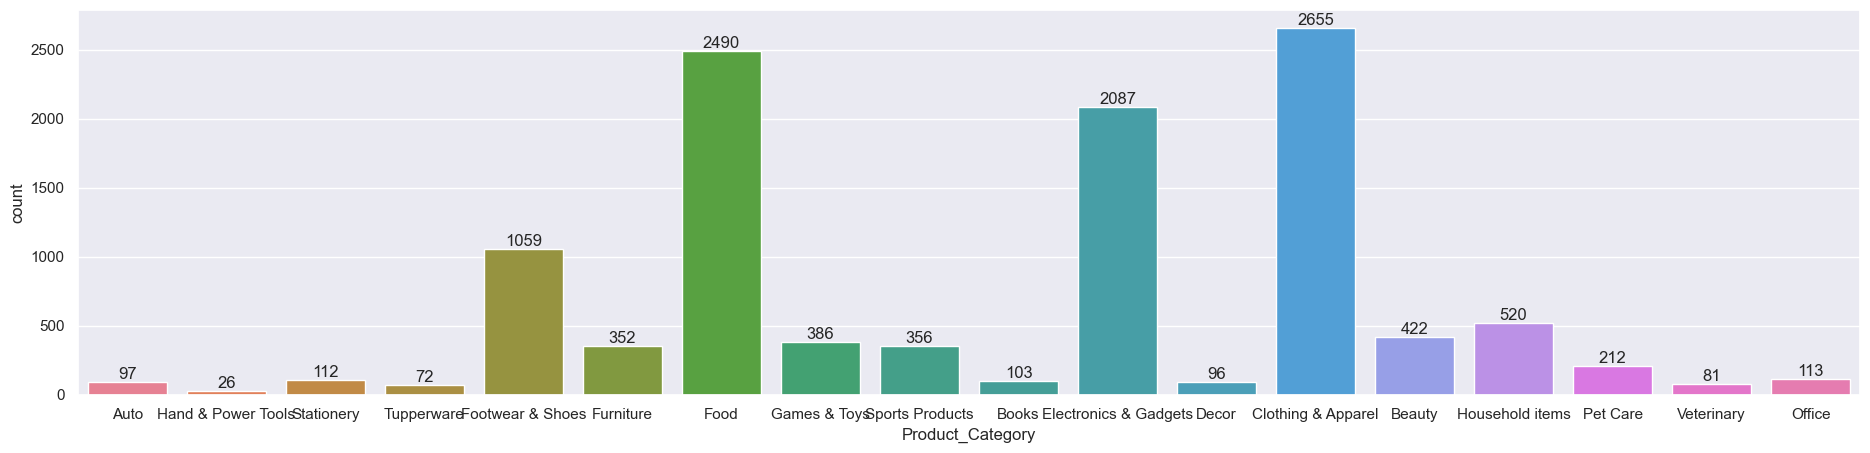

In [63]:
ax = sns.countplot(data=df, x='Product_Category', hue='Product_Category')
sns.set(rc={'figure.figsize':(23,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

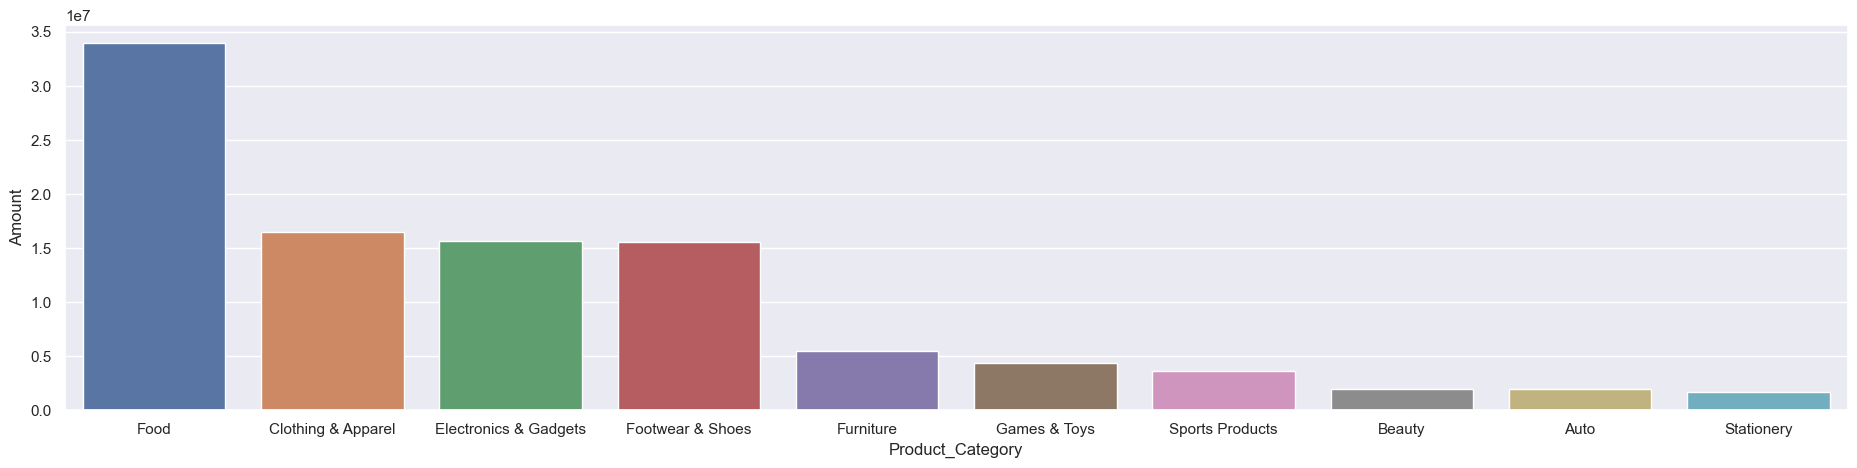

In [61]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(23,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount', hue='Product_Category')

####  From the above graph we can see that the most sold product are from Food, Clothing and Electronics.

<Axes: xlabel='Product_ID', ylabel='Orders'>

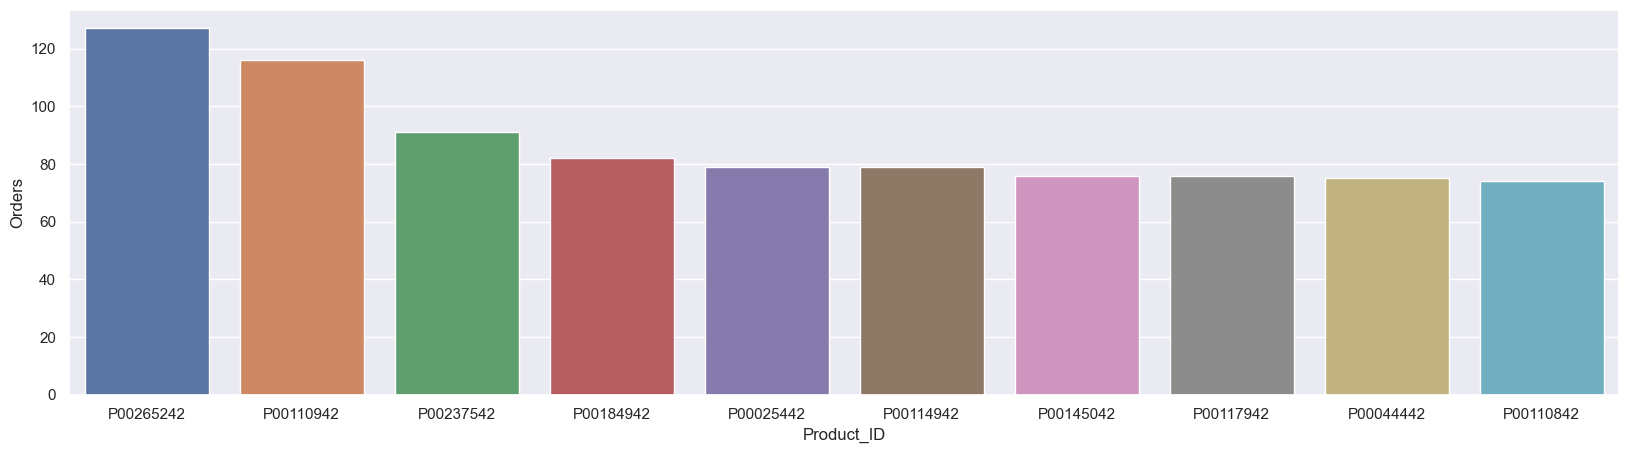

In [65]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', hue='Product_ID')

## Conclusion

#### Married Women age group 26-35 years from UP, Maharashtra, Karnataka working in IT , Healthcare and Aviation are more likely to buy products from Food, Footwear and Electronics category.